In [1]:

#importing dependencies
import numpy as np
from matplotlib import pyplot as plt
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#Creating sequential cnn model for training
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [4]:
#Visualizing model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [6]:
#Pre compilation before training model.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
25/25 [==============================] - 11s 428ms/step - loss: 0.4521 - accuracy: 0.7900 - val_loss: 0.2905 - val_accuracy: 0.9000
Epoch 2/10
25/25 [==============================] - 5s 216ms/step - loss: 0.1830 - accuracy: 0.9550 - val_loss: 0.2715 - val_accuracy: 0.9100
Epoch 3/10
25/25 [==============================] - 6s 235ms/step - loss: 0.1418 - accuracy: 0.9575 - val_loss: 0.2051 - val_accuracy: 0.9200
Epoch 4/10
25/25 [==============================] - 6s 240ms/step - loss: 0.1136 - accuracy: 0.9675 - val_loss: 0.2579 - val_accuracy: 0.9100
Epoch 5/10
25/25 [==============================] - 6s 238ms/step - loss: 0.1210 - accuracy: 0.9600 - val_loss: 0.2683 - val_accuracy: 0.9400
Epoch 6/10
25/25 [==============================] - 6s 230ms/step - loss: 0.2223 - accuracy: 0.9300 - val_loss: 0.2494 - val_accura

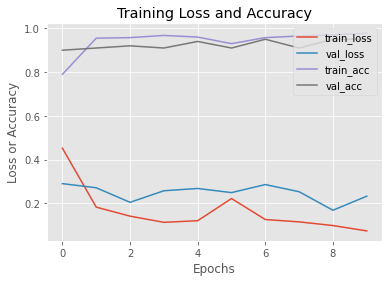

In [7]:

train_datagen = ImageDataGenerator(rescale=1.0/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0/255)
train=r'D:\FaceMaskDetector-master\train'
test=r'D:\FaceMaskDetector-master\test'

train_set = train_datagen.flow_from_directory(
        train,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        test,
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')

model_saved=model.fit_generator(
        train_set,
        epochs=10,
        validation_data=test_set
        )

model.save('FaceMask_model.h5', model_saved)

N = 10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), model_saved.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), model_saved.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), model_saved.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), model_saved.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss or Accuracy")
plt.legend(loc="upper right")

